<a href="https://colab.research.google.com/github/kimjuha0000/Project/blob/main/%EC%A0%84%EA%B8%B0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%ED%95%B4%EC%BB%A4%ED%86%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_EV%EB%A5%BC_%EC%9D%BD%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트 설정하기
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [ ]:
# train, test 데이터를 불러옵니다.
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


In [ ]:
test

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,P사,TayGTS,Pre-Owned,64.683,AWD,117298,2,No,0
842,TEST_842,V사,ID4,Pre-Owned,55.547,AWD,72308,0,No,0
843,TEST_843,V사,ID4,Pre-Owned,55.547,AWD,124537,0,No,0
844,TEST_844,A사,Q4eT,Nearly New,69.646,AWD,15629,4,No,0


In [ ]:
train.isna().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,2711
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


In [ ]:
train[['배터리용량','주행거리(km)','보증기간(년)','연식(년)','가격(백만원)']].corr() #배터리용량의 상관관계가 높지만 결측값이 많이 때문에 상관관계를 더 높여보는 방향으로 진행해보자.

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


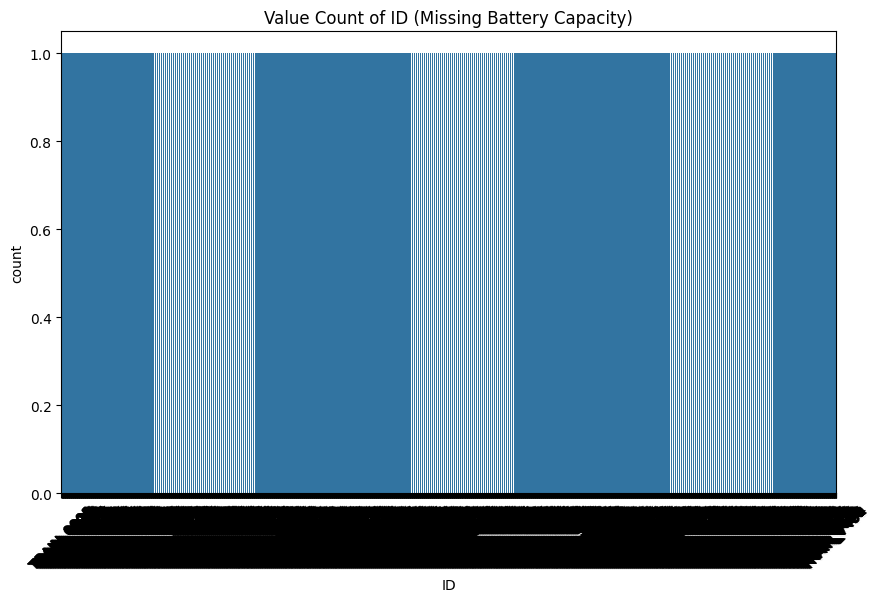

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


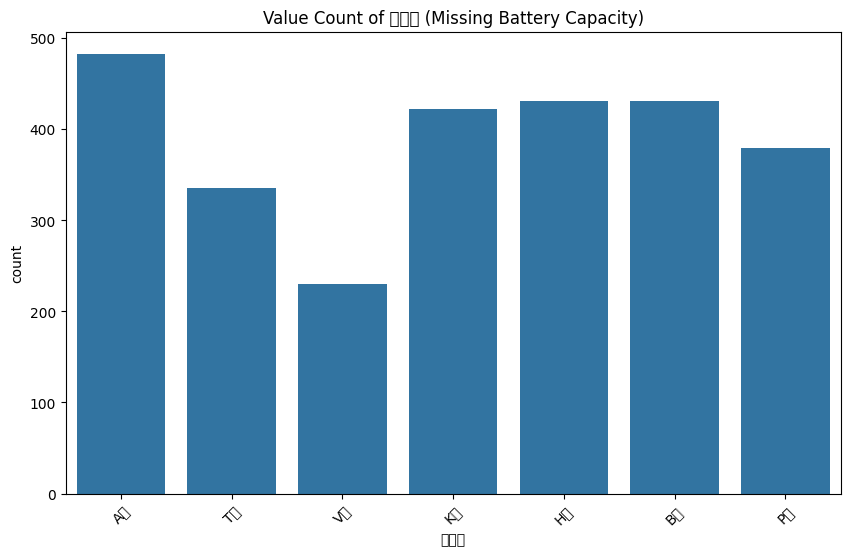

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


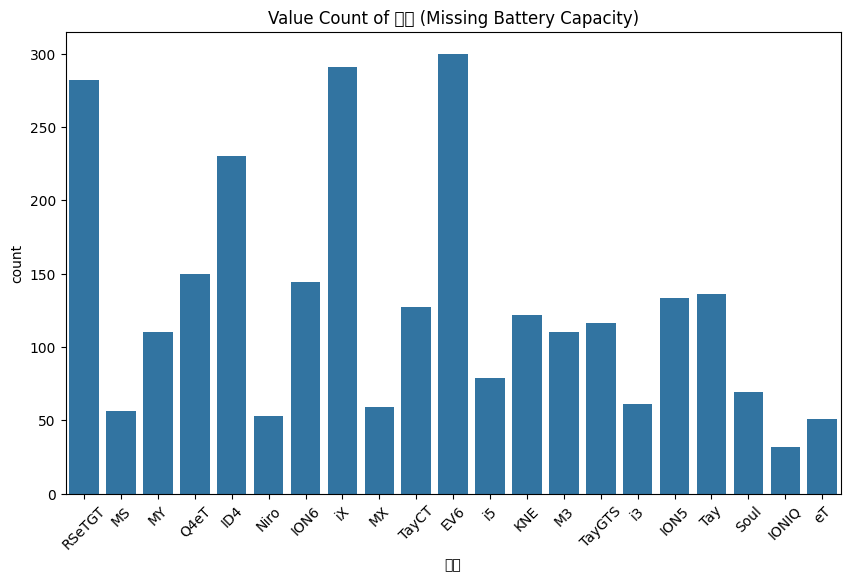

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


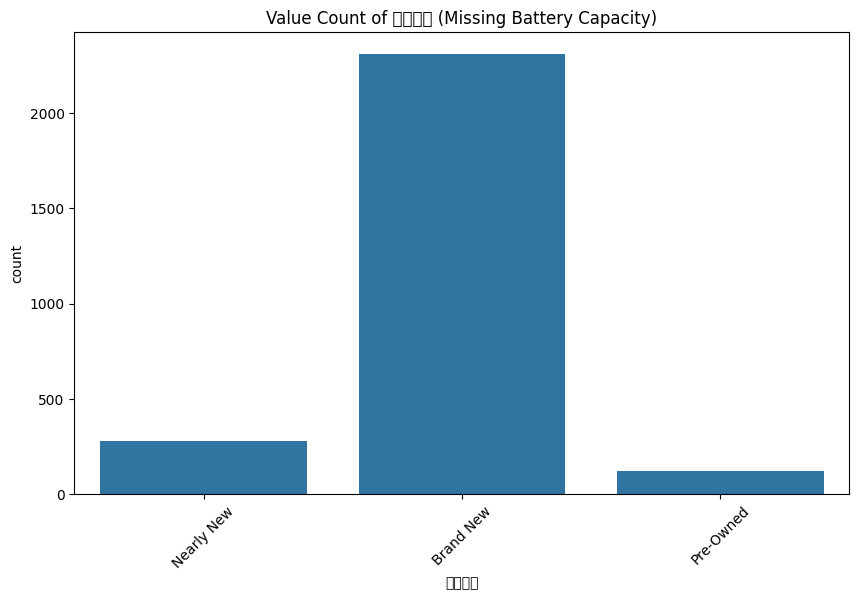

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


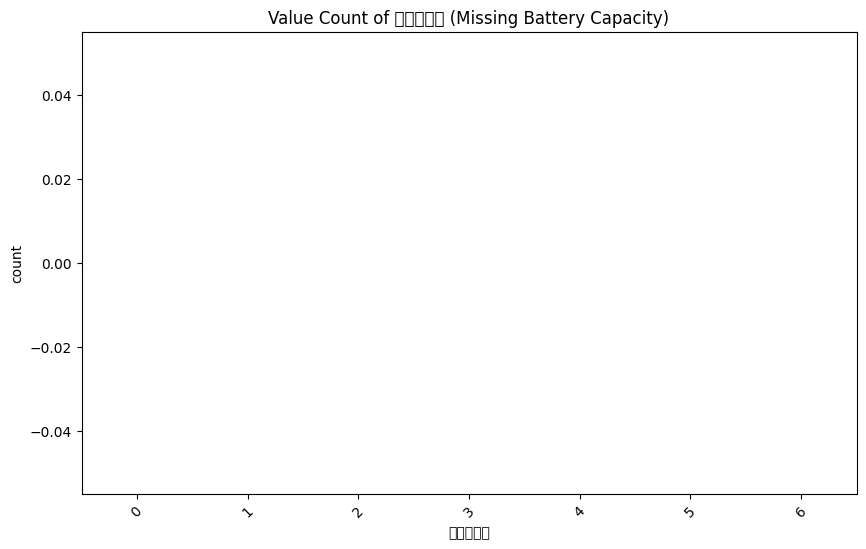

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


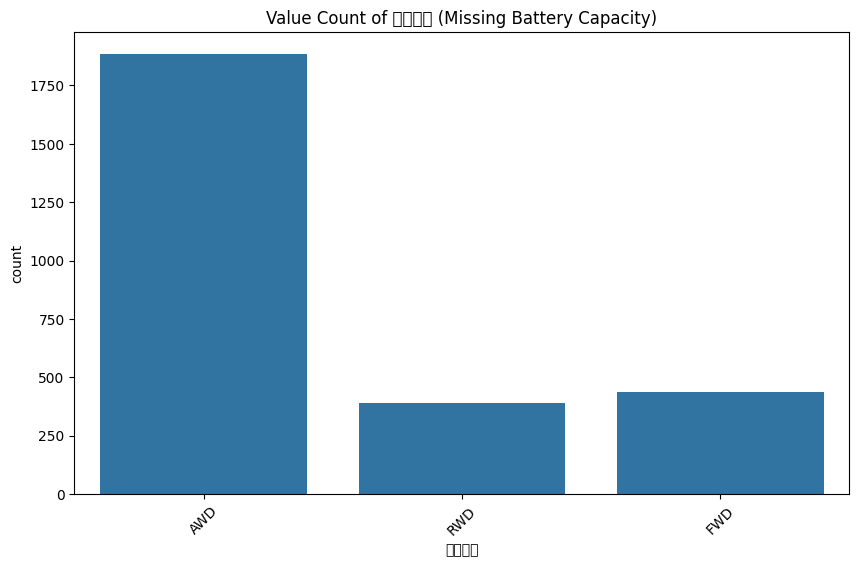

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


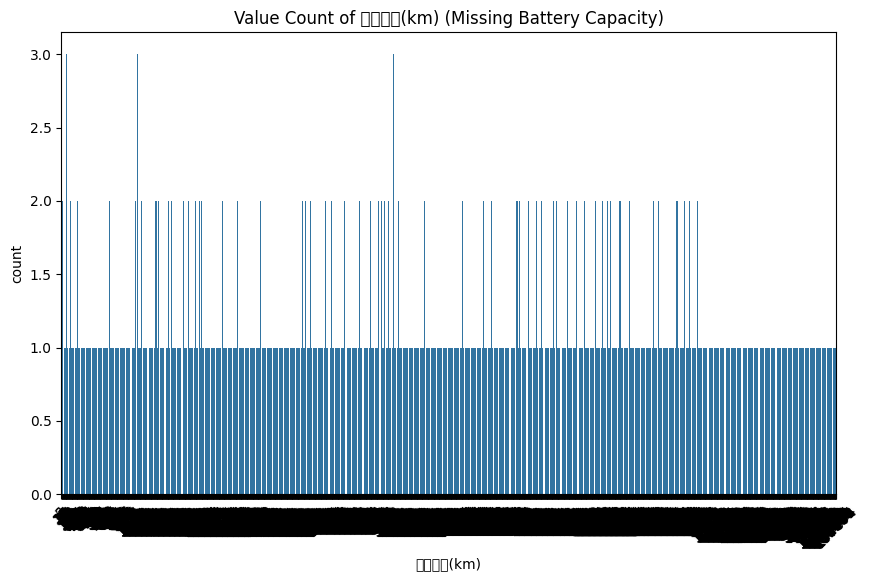

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


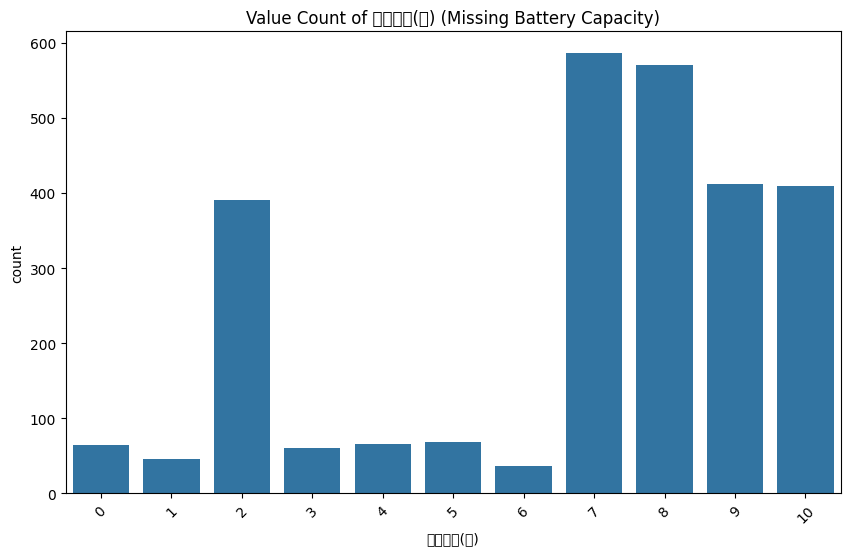

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


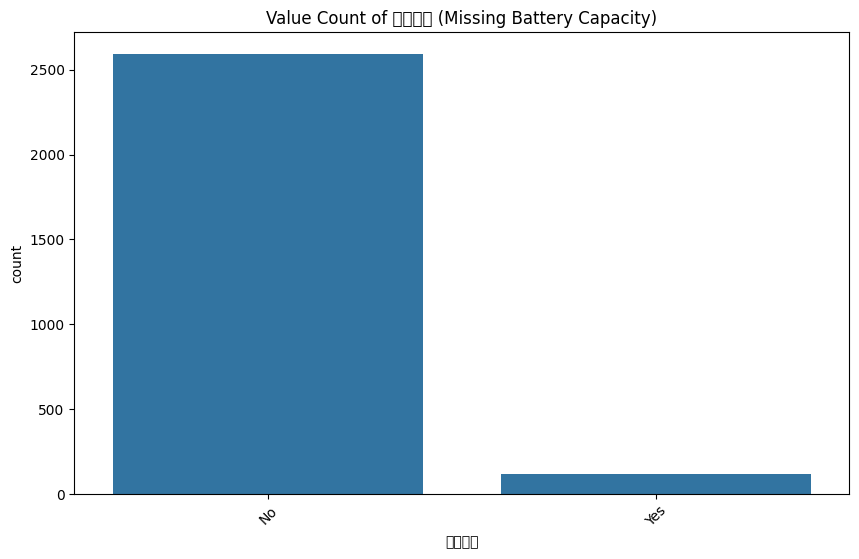

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


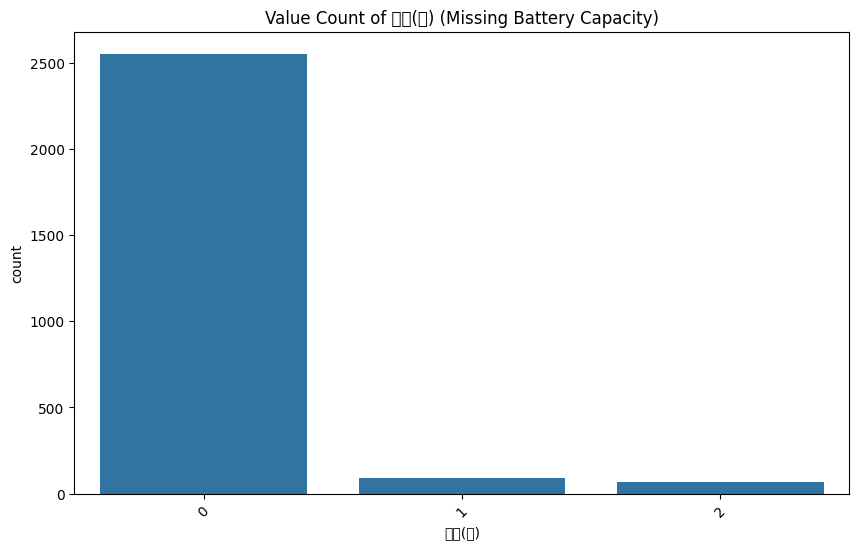

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


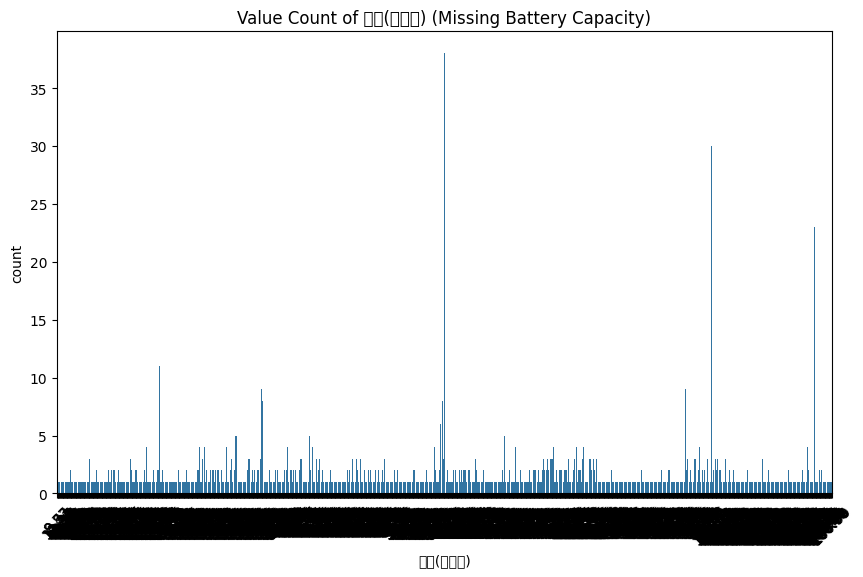

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 배터리용량이 결측값인 행만 선택
missing_battery = train[train['배터리용량'].isna()]

# 각 컬럼별로 value_counts를 계산하고 barplot으로 시각화
for column in missing_battery.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=missing_battery, x=column)
    plt.title(f"Value Count of {column} (Missing Battery Capacity)")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
train['차량상태'].value_counts()

,count
차량상태,
Brand New,3380
Nearly New,2059
Pre-Owned,2058


In [ ]:
train['연식(년)'].value_counts()

,count
연식(년),
0,6395
2,566
1,536


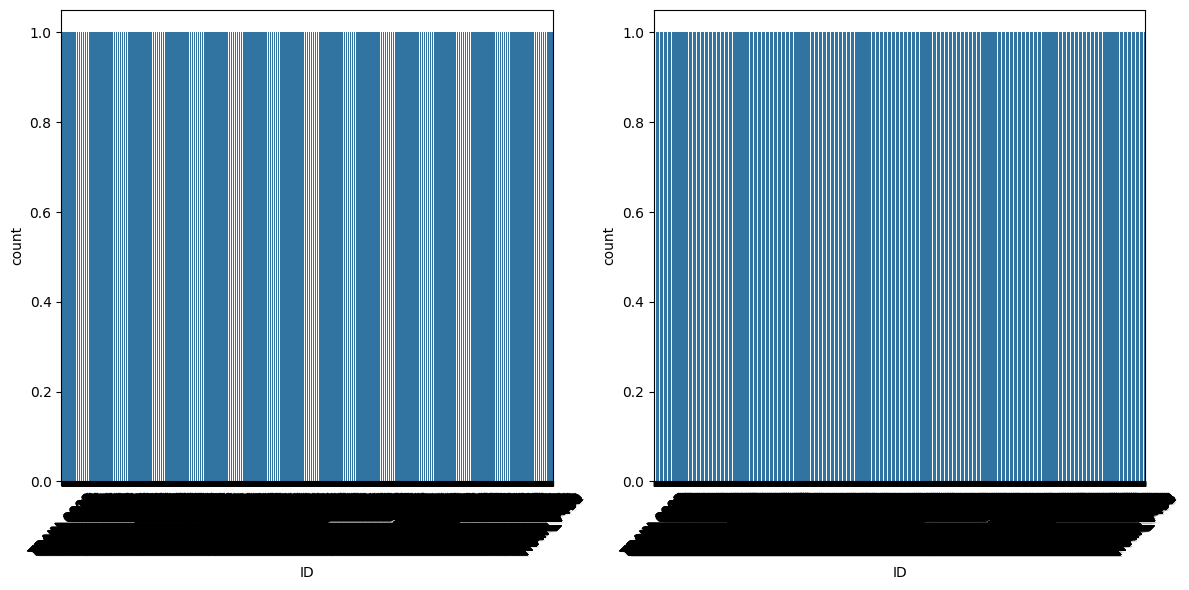

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaV

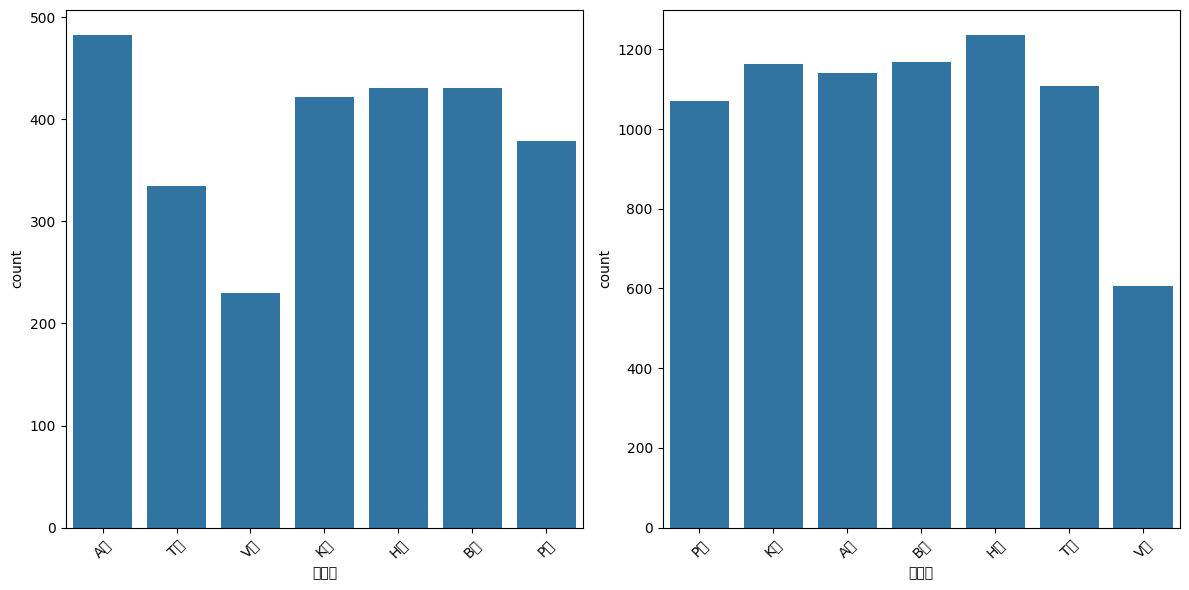

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


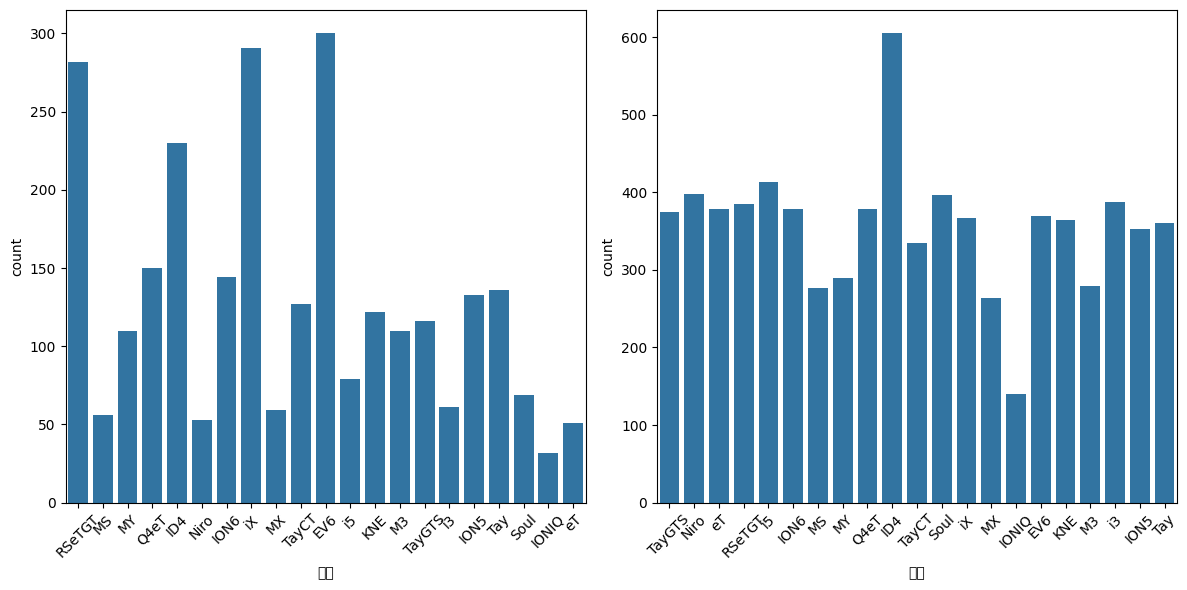

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

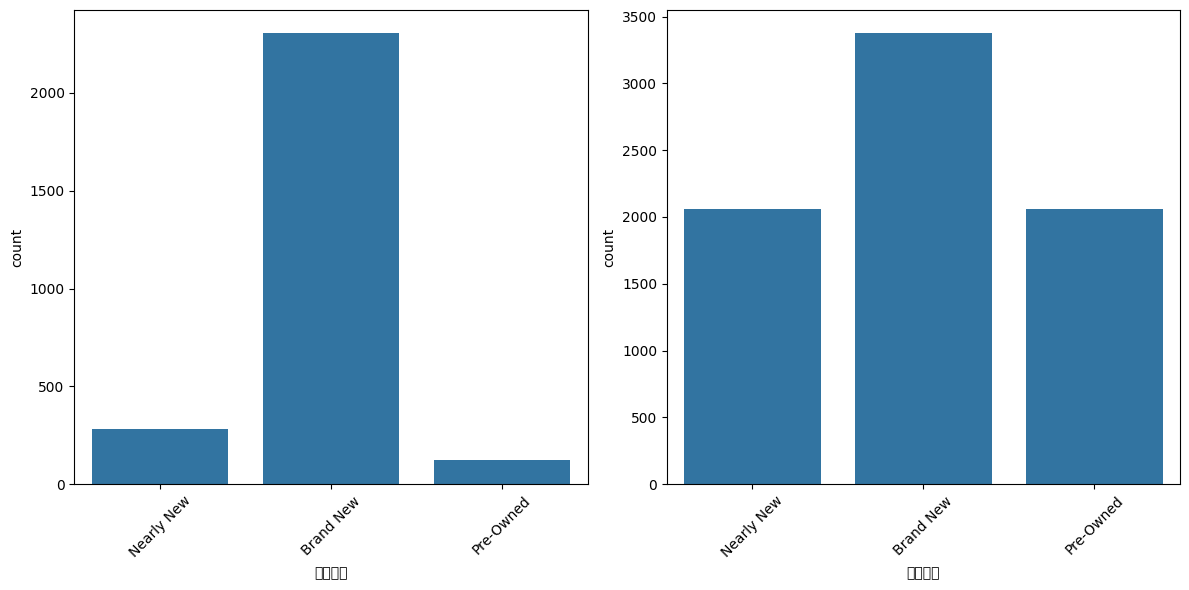

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

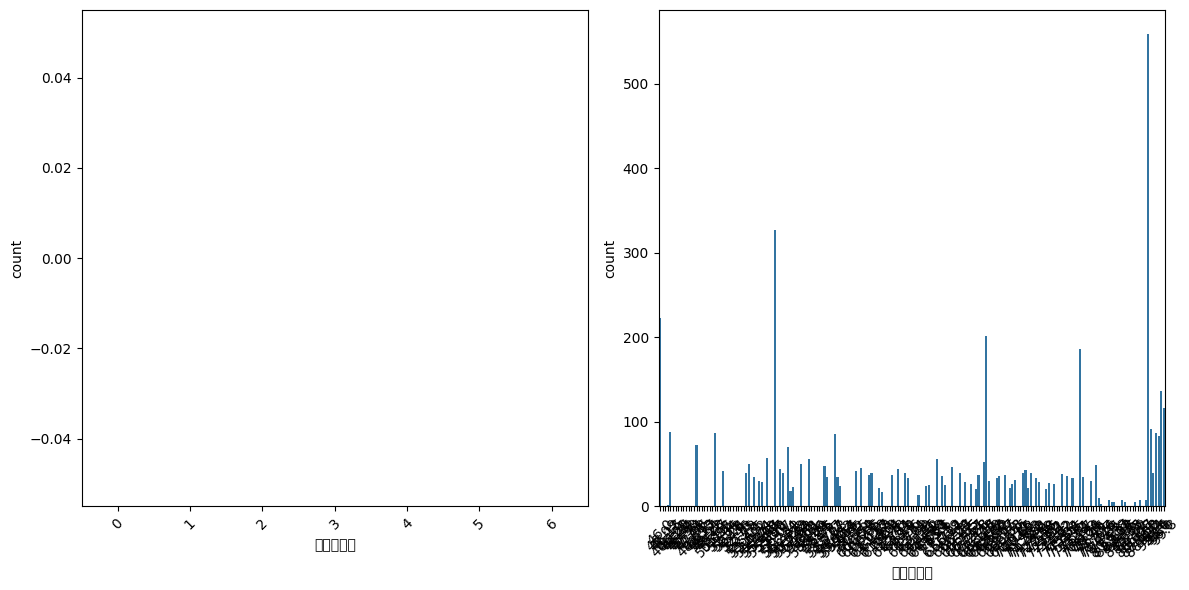

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

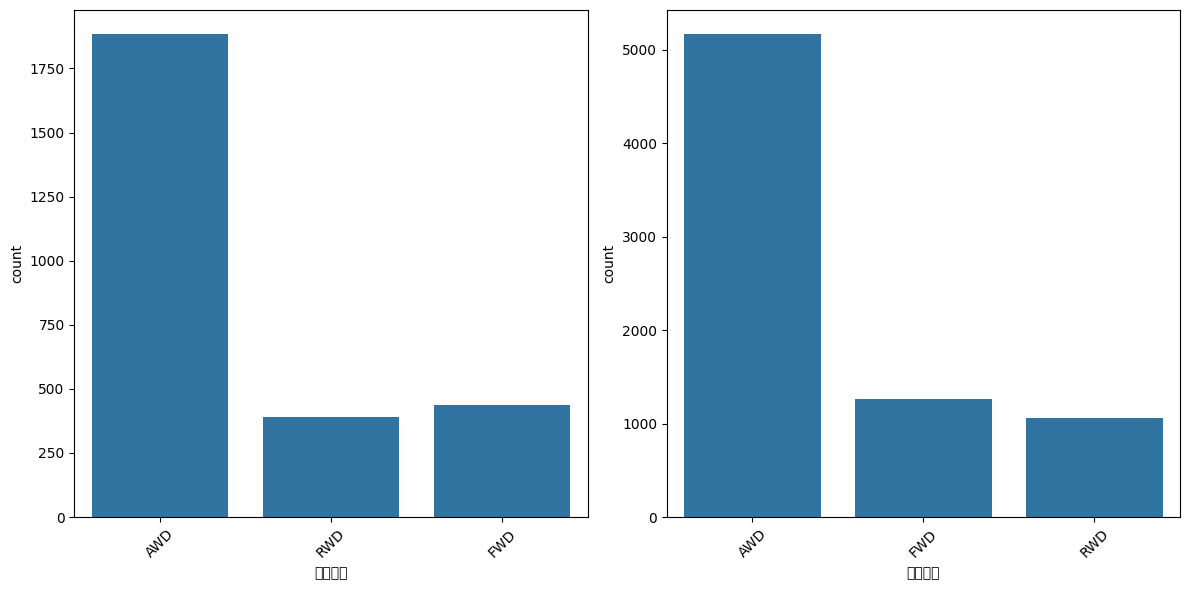

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

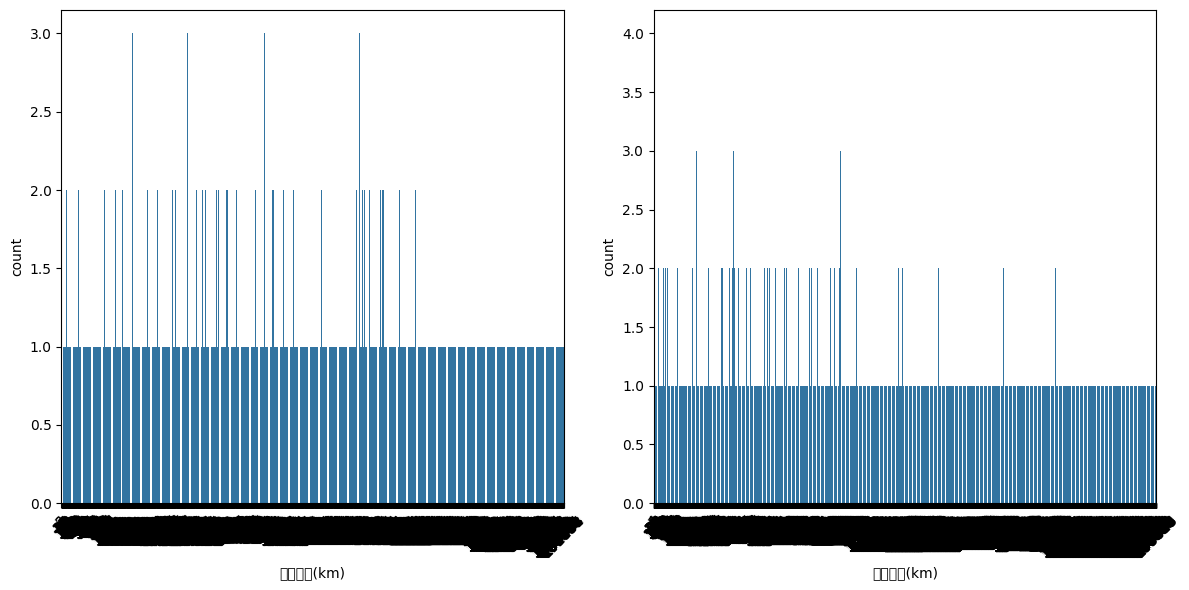

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

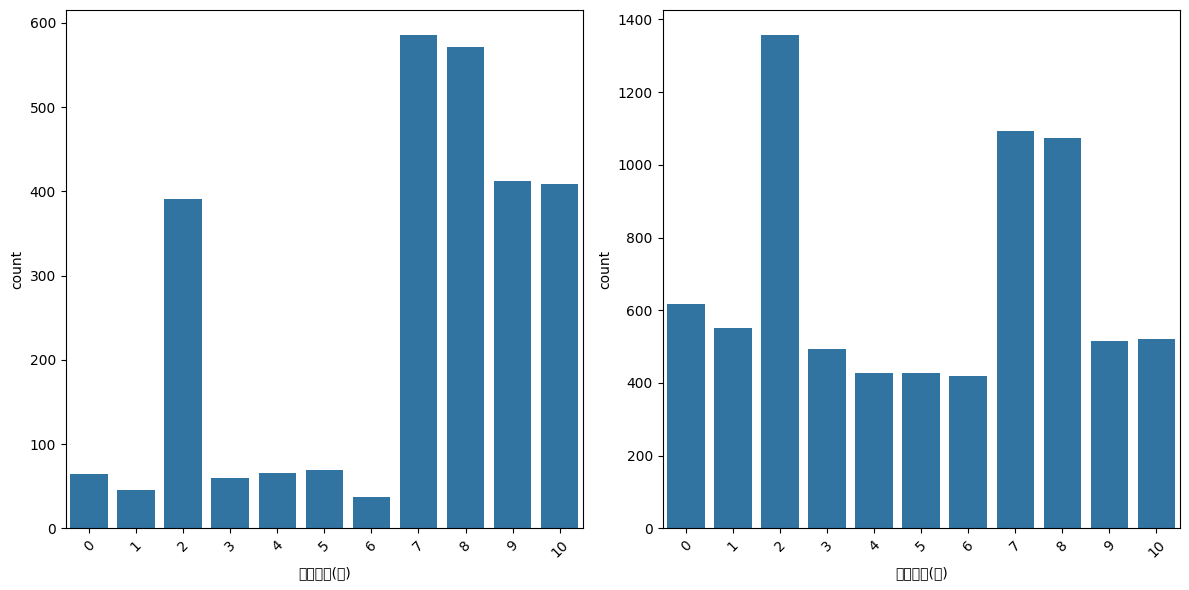

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

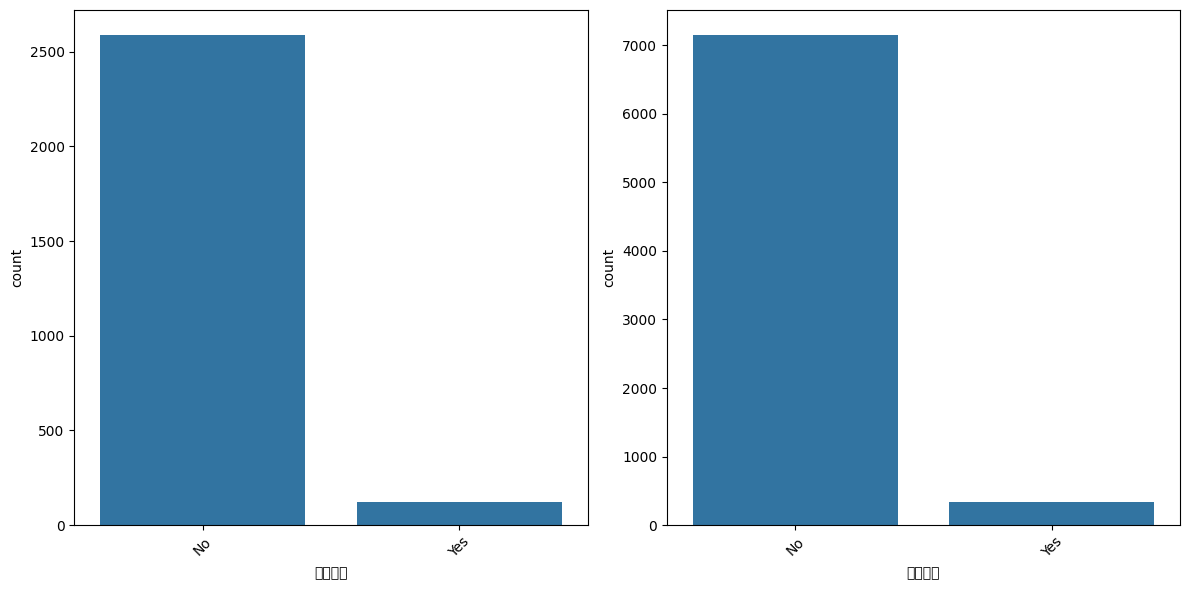

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from f

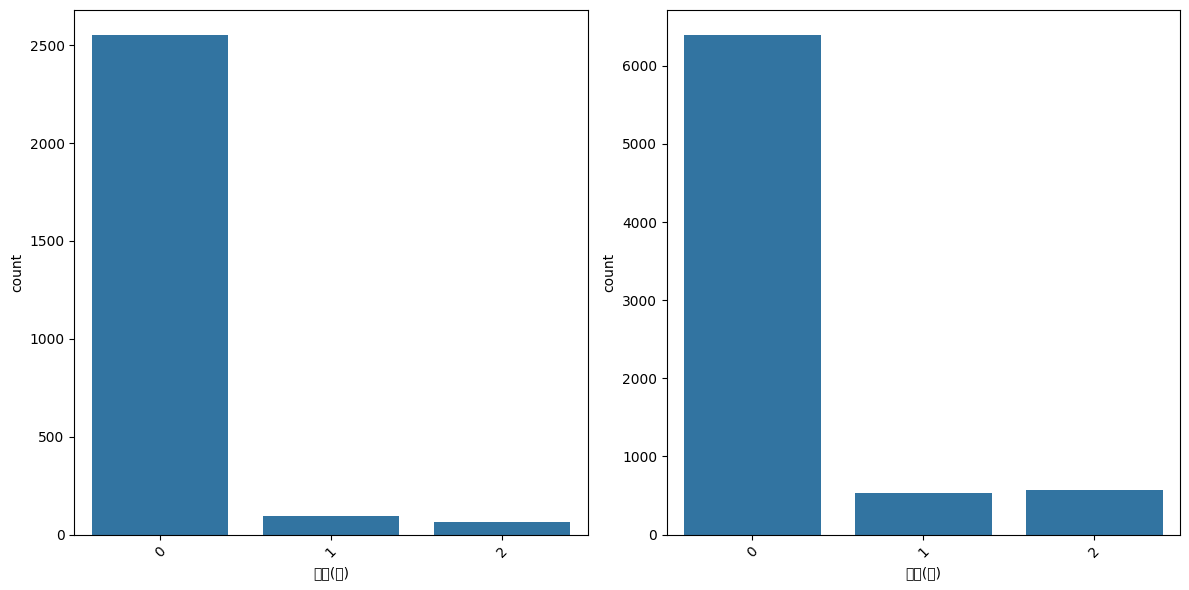

<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
<ipython-input-11-faf49d1a124e>:21: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

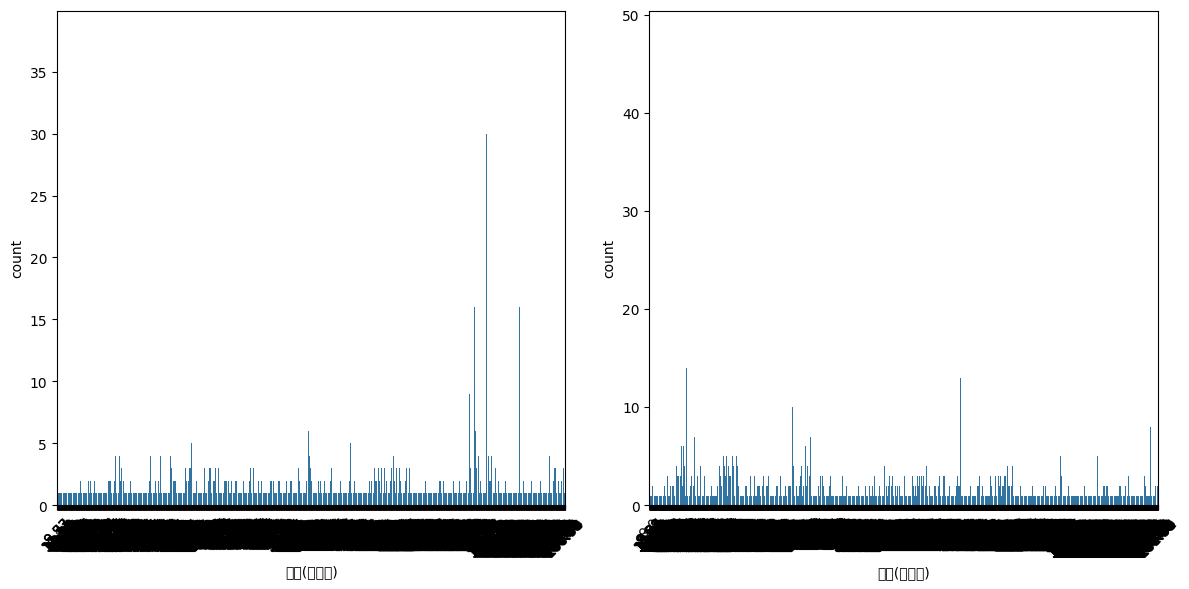

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 배터리용량 결측값이 있는 행
missing_battery = train[train['배터리용량'].isna()]

# 각 컬럼별로 barplot을 그리기
for column in train.columns:
    plt.figure(figsize=(12, 6))

    # 배터리용량 결측값이 있는 행에 대한 barplot
    plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 위치
    sns.countplot(data=missing_battery, x=column)
    plt.xticks(rotation=45)

    # 배터리용량 결측값이 없는 행에 대한 barplot
    plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 위치
    sns.countplot(data=train, x=column)
    plt.xticks(rotation=45)

    plt.tight_layout()  # 레이아웃 조정
    plt.show()

In [ ]:
train[train['배터리용량'].isna()] #차량상태에 따라 배터리용량이 다른가?

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
6,TRAIN_0006,T사,MS,Nearly New,NaN,AWD,19395,3,No,0,83.42
8,TRAIN_0008,T사,MY,Brand New,NaN,AWD,2226,8,No,0,74.06
9,TRAIN_0009,A사,Q4eT,Brand New,NaN,AWD,3683,7,No,0,59.66
11,TRAIN_0011,V사,ID4,Brand New,NaN,AWD,1131,8,No,0,40.50
...,...,...,...,...,...,...,...,...,...,...,...
7489,TRAIN_7489,H사,ION5,Brand New,NaN,AWD,8871,9,No,0,35.83
7490,TRAIN_7490,A사,Q4eT,Brand New,NaN,AWD,5794,7,No,0,59.95
7491,TRAIN_7491,K사,Soul,Brand New,NaN,FWD,5966,10,No,0,16.75
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95


In [ ]:
train.groupby('차량상태')['모델'].value_counts()

차량상태        모델    
Brand New   EV6       369
            iX        367
            ID4       276
            RSeTGT    180
            ION6      179
            Q4eT      175
            eT        174
            TayGTS    173
            ION5      170
            Tay       168
            KNE       163
            TayCT     149
            M3        135
            MY        133
            MS        126
            MX        126
            i5         88
            Soul       81
            Niro       75
            i3         73
Nearly New  ID4       169
            i3        166
            Soul      160
            i5        158
            Niro      157
            Q4eT      114
            KNE       108
            RSeTGT    108
            eT        102
            Tay        99
            TayGTS     97
            TayCT      90
            ION6       88
            ION5       87
            MS         79
            MY         76
            M3         73
            IONIQ      66
            MX         62
Pre-Owned   i5        168
            Niro      166
            ID4       160
            Soul      156
            i3        149
            ION6      112
            TayGTS    105
            eT        103
            RSeTGT     97
            ION5       96
            TayCT      96
            KNE        94
            Tay        94
            Q4eT       89
            MY         80
            MX         76
            IONIQ      74
            MS         72
            M3         71
Name: count, dtype: int64

In [ ]:
train.groupby('모델')['배터리용량'].mean() #모델이 배터리용량에 가장 큰 영향을 주기 때문에 모델로 결측치를 보간해보자.

,배터리용량
모델,
EV6,90.000000
ID4,65.424440
ION5,66.439545
ION6,65.876923
IONIQ,62.044352
KNE,72.117597
M3,64.482882
MS,89.672213
MX,90.031151


In [ ]:
# 모델별 평균 배터리용량 계산
model_mean = train.groupby('모델')['배터리용량'].transform('mean')

# 배터리용량 결측값을 모델별 평균값으로 채우기
train['배터리용량'] = train['배터리용량'].fillna(model_mean)


In [ ]:
train.isna().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,0
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


In [ ]:
train[['배터리용량','주행거리(km)','보증기간(년)','연식(년)','가격(백만원)']].corr() # 소폭상승했다.

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.470917,0.383864,-0.029175,0.440537
주행거리(km),-0.470917,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.383864,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.029175,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.440537,-0.035488,-0.349962,-0.058455,1.000000


In [ ]:
train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077000,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200000,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,84.399252,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018000,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,66.439545,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,77.563933,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000000,RWD,39445,6,No,2,24.00


In [ ]:
train.groupby('차량상태')['가격(백만원)'].mean() #모델별로 가격은 큰 차이 없음

,가격(백만원)
차량상태,
Brand New,65.092287
Nearly New,60.497742
Pre-Owned,59.633547


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드 (train이 이미 로드된 상태라고 가정)
# X, y 설정
X = train.drop(columns=['가격(백만원)'])
y = train['가격(백만원)']

# object형 컬럼들만 선택
object_cols = X.select_dtypes(include=['object']).columns

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 준비
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# 더미화 작업 (Pipeline 사용)
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), object_cols)],
    remainder='passthrough'
)

# 결과를 저장할 DataFrame
results = pd.DataFrame(columns=['Model', 'R^2', 'RMSE'])

# 각 모델 학습 및 성능 평가
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # 모델 학습
    pipeline.fit(X_train, y_train)

    # 예측
    y_pred = pipeline.predict(X_test)

    # 성능 평가
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # 결과 저장 (concat으로 변경)
    results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'R^2': [r2], 'RMSE': [rmse]})], ignore_index=True)

# 성능 결과 출력
print(results)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-20-ec0cac6baff1>:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'R^2': [r2], 'RMSE': [rmse]})], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packa

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 40
[LightGBM] [Info] Start training from score 62.221487


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


               Model       R^2      RMSE
0      Decision Tree  0.997106  1.994023
1  Linear Regression  0.962773  7.151955
2  Gradient Boosting  0.992054  3.304263
3           LightGBM  0.998402  1.481735
4      Random Forest  0.998419  1.473695


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드 (train이 이미 로드된 상태라고 가정)
# X, y 설정
X = train.drop(columns=['가격(백만원)'])
y = train['가격(백만원)']

# object형 컬럼들만 선택
object_cols = X.select_dtypes(include=['object']).columns

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 준비
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# 더미화 작업 (Pipeline 사용)
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), object_cols)],
    remainder='passthrough'
)

# 결과를 저장할 DataFrame
results = pd.DataFrame(columns=['Model', 'Train R^2', 'Test R^2', 'Train RMSE', 'Test RMSE', 'Overfitting'])

# 각 모델 학습 및 성능 평가
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # 모델 학습
    pipeline.fit(X_train, y_train)

    # 훈련 데이터 예측
    y_train_pred = pipeline.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # 테스트 데이터 예측
    y_test_pred = pipeline.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # 과적합 여부 판단 (R² 차이가 0.1 이상 or RMSE 차이가 1 이상일 경우)
    if train_r2 - test_r2 > 0.1 or train_rmse - test_rmse < -1:
        overfitting_status = "Possible Overfitting"
    else:
        overfitting_status = "No Overfitting"

    # 결과 저장
    results = pd.concat([results, pd.DataFrame({'Model': [model_name],
                                                'Train R^2': [train_r2],
                                                'Test R^2': [test_r2],
                                                'Train RMSE': [train_rmse],
                                                'Test RMSE': [test_rmse],
                                                'Overfitting': [overfitting_status]})], ignore_index=True)

# 성능 결과 출력
results


<ipython-input-21-93147cb0e3d2>:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Model': [model_name],
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 40
[LightGBM] [Info] Start training from score 62.221487


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE,Overfitting
0,Decision Tree,1.000000,0.997106,6.663991e-16,1.994023,Possible Overfitting
1,Linear Regression,0.965411,0.962773,6.795150e+00,7.151955,No Overfitting
2,Gradient Boosting,0.992459,0.992054,3.172722e+00,3.304263,No Overfitting
3,LightGBM,0.998882,0.998402,1.221780e+00,1.481735,No Overfitting
4,Random Forest,0.999788,0.998419,5.320636e-01,1.473695,No Overfitting


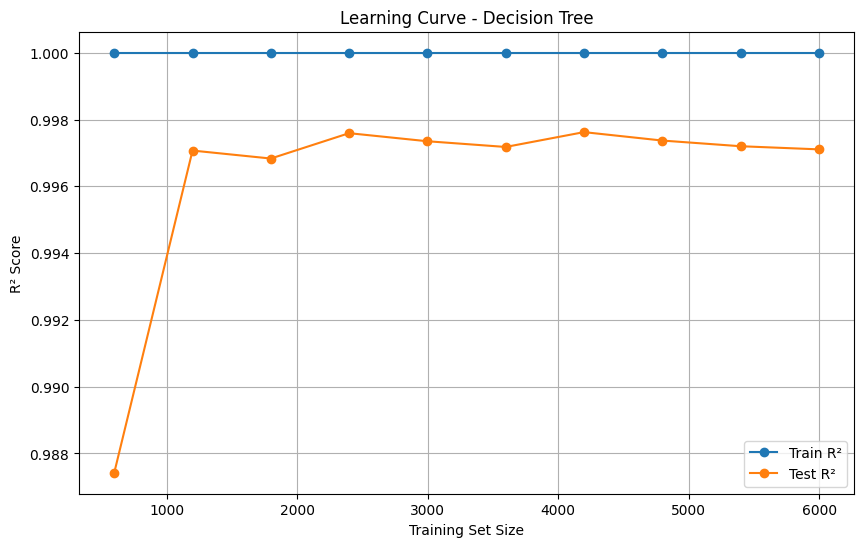

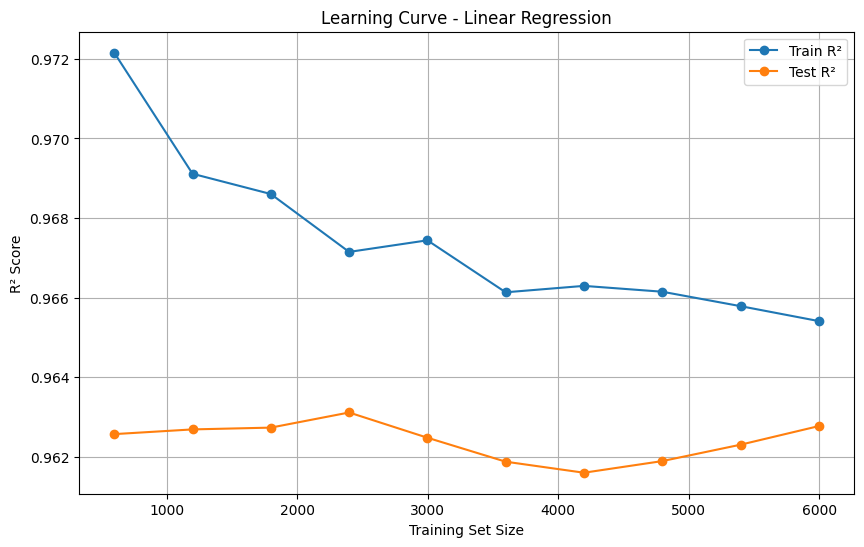

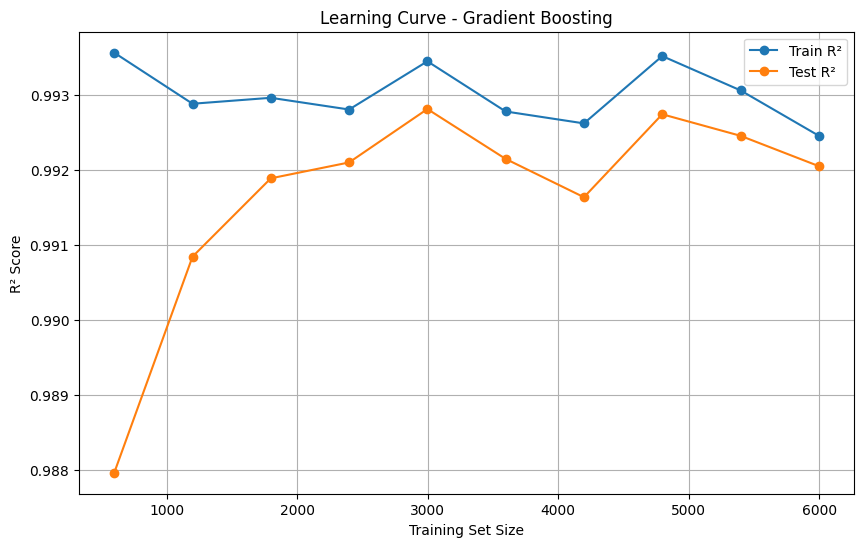

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 37
[LightGBM] [Info] Start training from score 62.964791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 39
[LightGBM] [Info] Start training from score 61.953203


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 1799, number of used features: 40
[LightGBM] [Info] Start training from score 61.939905


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 2398, number of used features: 40
[LightGBM] [Info] Start training from score 61.699316


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 2998, number of used features: 40
[LightGBM] [Info] Start training from score 62.262051


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 3598, number of used features: 40
[LightGBM] [Info] Start training from score 62.140903


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 4197, number of used features: 40
[LightGBM] [Info] Start training from score 62.369840


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 4797, number of used features: 40
[LightGBM] [Info] Start training from score 62.073262


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 5397, number of used features: 40
[LightGBM] [Info] Start training from score 62.312422


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 40
[LightGBM] [Info] Start training from score 62.221487


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LG

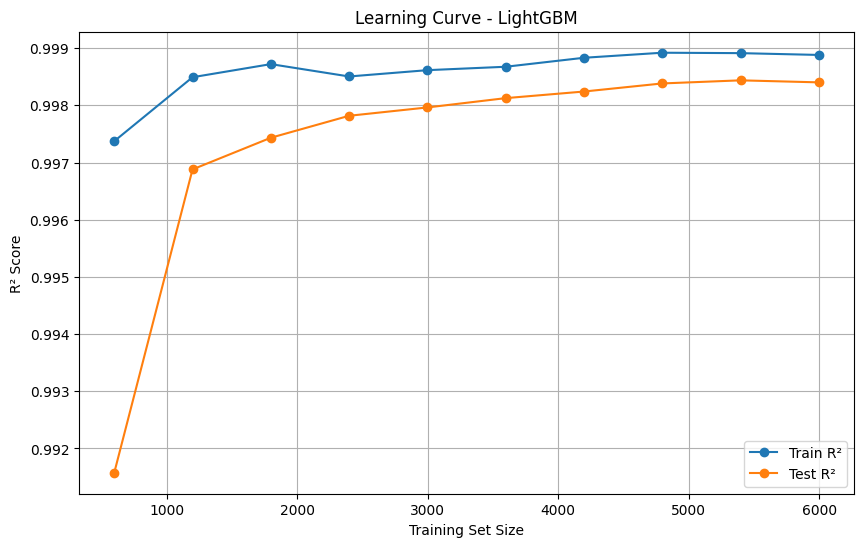

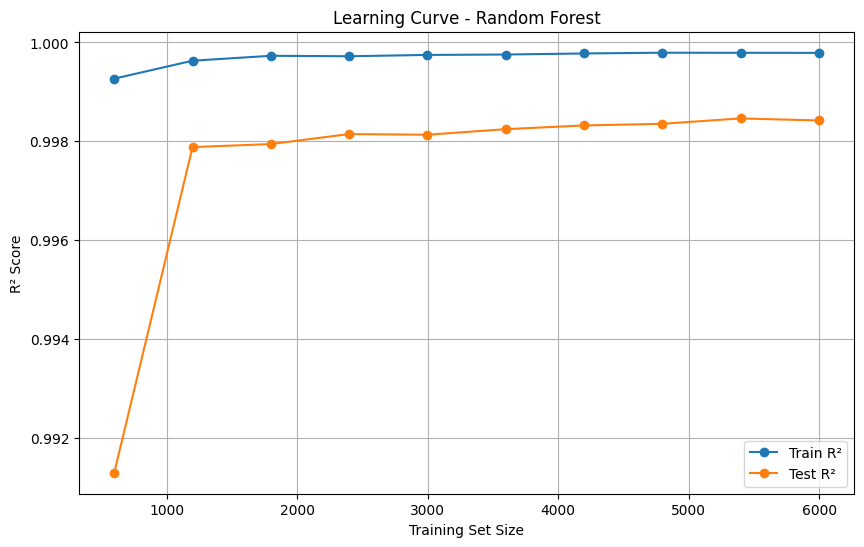

In [ ]:
import matplotlib.pyplot as plt

# 러닝 커브 함수 정의
def plot_learning_curve(model, model_name, X_train, X_test, y_train, y_test, preprocessor):
    train_sizes = np.linspace(0.1, 1.0, 10)  # 학습 데이터 비율 (10%, 20%, ..., 100%)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        # 훈련 데이터의 부분 집합 선택
        subset_X_train = X_train[:int(len(X_train) * train_size)]
        subset_y_train = y_train[:int(len(y_train) * train_size)]

        # 파이프라인 구성
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipeline.fit(subset_X_train, subset_y_train)

        # 훈련 및 테스트 성능 저장
        y_train_pred = pipeline.predict(subset_X_train)
        y_test_pred = pipeline.predict(X_test)
        train_scores.append(r2_score(subset_y_train, y_train_pred))
        test_scores.append(r2_score(y_test, y_test_pred))

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(X_train), train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes * len(X_train), test_scores, label='Test R²', marker='o')
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid()
    plt.show()

# 각 모델에 대해 러닝 커브 그리기
for model_name, model in models.items():
    plot_learning_curve(model, model_name, X_train, X_test, y_train, y_test, preprocessor)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 40
[LightGBM] [Info] Start training from score 62.221487
Initial R^2: 0.9984
Initial RMSE: 1.4817


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Top 10 Features:
                 Feature  Importance
6001         cat__제조사_P사   19.576194
6033    remainder__배터리용량    8.079283
6002         cat__제조사_T사    5.140305
6035  remainder__보증기간(년)    3.373040
5997         cat__제조사_A사    3.068247
6023          cat__모델_i5    2.591116
6016      cat__모델_RSeTGT    2.272538
6020      cat__모델_TayGTS    2.136187
6028       cat__구동방식_AWD    1.696304
6024          cat__모델_iX    1.352042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 10
[LightGBM] [Info] Start training from score 62.221487


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning

Selected Features R^2: 0.9934
Selected Features RMSE: 3.0086


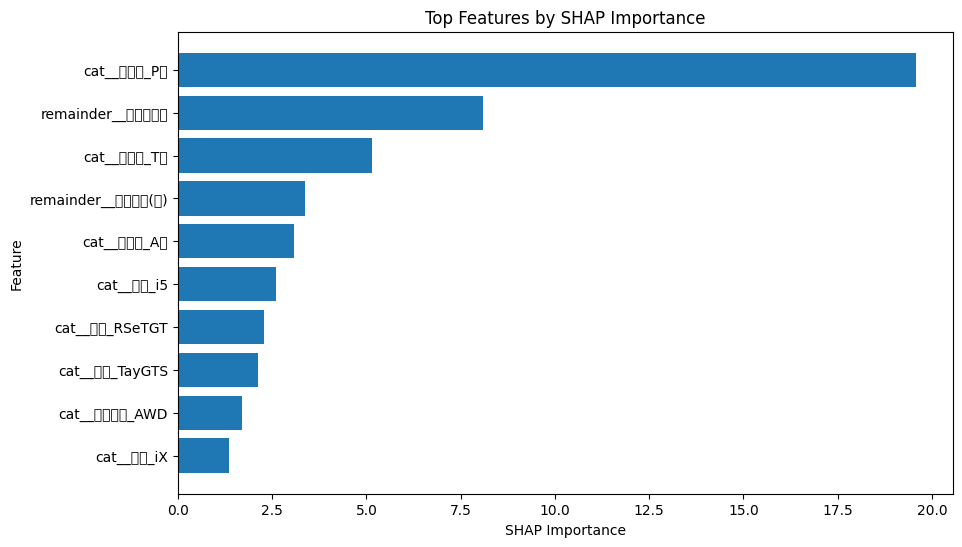

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# 데이터 로드 (train이 이미 로드된 상태라고 가정)
# X, y 설정
X = train.drop(columns=['가격(백만원)'])
y = train['가격(백만원)']

# object형 컬럼들만 선택
object_cols = X.select_dtypes(include=['object']).columns

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 준비
model = lgb.LGBMRegressor(random_state=42)

# ColumnTransformer와 OneHotEncoder 설정
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), object_cols)],
    remainder='passthrough'
)

# Pipeline 생성
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Initial R^2: {r2:.4f}")
print(f"Initial RMSE: {rmse:.4f}")

# SHAP 값 계산
explainer = shap.TreeExplainer(pipeline.named_steps['model'])

# Preprocessor를 통해 변환된 컬럼 이름 가져오기
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# 변환된 X_train으로 SHAP 값 계산
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
shap_values = explainer.shap_values(X_train_transformed)

# 피쳐 중요도 계산
shap_importance = np.abs(shap_values).mean(axis=0)

# 피쳐 중요도 DataFrame 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_importance
}).sort_values(by='Importance', ascending=False)

# 중요도가 높은 상위 10개 피쳐 선택
top_n = 10
top_features = importance_df.head(top_n)
print(f"Top {top_n} Features:\n{top_features}")

# 상위 피쳐로 학습 데이터 재구성
top_feature_names = top_features['Feature'].tolist()
X_train_selected = pd.DataFrame(X_train_transformed, columns=feature_names)[top_feature_names]
X_test_selected = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[top_feature_names]

# 상위 피쳐만으로 모델 재학습
pipeline_selected = Pipeline(steps=[('model', model)])
pipeline_selected.fit(X_train_selected, y_train)

# 재학습 모델 평가
y_pred_selected = pipeline_selected.predict(X_test_selected)
r2_selected = r2_score(y_test, y_pred_selected)
rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))

# 성능 비교 출력
print(f"Selected Features R^2: {r2_selected:.4f}")
print(f"Selected Features RMSE: {rmse_selected:.4f}")

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('SHAP Importance')
plt.ylabel('Feature')
plt.title('Top Features by SHAP Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# 데이터 로드 (train이 이미 로드된 상태라고 가정)
# X, y 설정
X = train.drop(columns=['가격(백만원)'])
y = train['가격(백만원)']

# object형 컬럼들만 선택
object_cols = X.select_dtypes(include=['object']).columns

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 준비
model = lgb.LGBMRegressor(random_state=42)

# ColumnTransformer와 OneHotEncoder 설정
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), object_cols)],
    remainder='passthrough'
)

# Pipeline 생성
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 결과 출력
print(f"Initial R^2: {r2:.4f}")
print(f"Initial RMSE: {rmse:.4f}")

# SHAP 값 계산
explainer = shap.TreeExplainer(pipeline.named_steps['model'])

# Preprocessor를 통해 변환된 컬럼 이름 가져오기
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# 변환된 X_train으로 SHAP 값 계산
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
shap_values = explainer.shap_values(X_train_transformed)

# 피쳐 중요도 계산
shap_importance = np.abs(shap_values).mean(axis=0)

# 피쳐 중요도 DataFrame 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_importance
}).sort_values(by='Importance', ascending=False)

# 피쳐 개수별 RMSE 평가
rmse_results = []
for num_features in range(1, len(importance_df) + 1):
    # 상위 num_features개 피쳐를 선택
    selected_features = importance_df.head(num_features)['Feature'].tolist()

    # 상위 피쳐들로 데이터 재구성
    X_train_subset = pd.DataFrame(X_train_transformed, columns=feature_names)[selected_features]
    X_test_subset = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[selected_features]

    # 상위 피쳐만으로 모델 재학습
    model.fit(X_train_subset, y_train)
    y_pred_subset = model.predict(X_test_subset)

    # RMSE 계산
    rmse_subset = np.sqrt(mean_squared_error(y_test, y_pred_subset))
    rmse_results.append((num_features, rmse_subset))

# 최적의 피쳐 개수 및 RMSE
optimal_features, optimal_rmse = min(rmse_results, key=lambda x: x[1])
print(f"Optimal Number of Features: {optimal_features}")
print(f"Optimal RMSE: {optimal_rmse:.4f}")

# 성능 비교 시각화
feature_counts, rmses = zip(*rmse_results)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, rmses, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.axvline(optimal_features, color='red', linestyle='--', label=f'Optimal Features: {optimal_features}')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 40
[LightGBM] [Info] Start training from score 62.221487


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Initial R^2: 0.9984
Initial RMSE: 1.4817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 1
[LightGBM] [Info] Start training from score 62.221487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

KeyboardInterrupt: 

In [ ]:
selected_features = importance_df.head(optimal_features)['Feature'].tolist()


# 최적의 피쳐로 데이터 재구성
X_train_final = pd.DataFrame(X_train_transformed, columns=feature_names)[selected_features]
X_test_final = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_test), columns=feature_names)[selected_features]

# 최적 피쳐로 LightGBM 모델 학습
final_model = lgb.LGBMRegressor(random_state=42)
final_model.fit(X_train_final, y_train)

# 최적 피쳐로 학습된 모델의 성능 평가a
y_pred_final = final_model.predict(X_test_final)
r2_final = r2_score(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))

# 결과 출력
print(f"Final Model R^2: {r2_final:.4f}")
print(f"Final Model RMSE: {rmse_final:.4f}")

NameError: name 'optimal_features' is not defined

In [ ]:
test

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

# 1. 이상치 처리 (Z-Score 기반)
def remove_outliers(df, z_thresh=3):
    z_scores = zscore(df.select_dtypes(include=np.number))
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < z_thresh).all(axis=1)
    return df[filtered_entries]

# 훈련 데이터에서 이상치 제거
train_no_outliers = remove_outliers(pd.concat([X_train, y_train], axis=1))
X_train, y_train = train_no_outliers.drop(columns=['가격(백만원)']), train_no_outliers['가격(백만원)']

# 2. 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=np.number).columns

# 수치형 피처 스케일링
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. 모델 파라미터 튜닝 (LightGBM)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# 재구성된 최적 피처 데이터로 튜닝
grid_search.fit(X_train[selected_features], y_train)

# 최적 모델 찾기
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 4. 최적 모델 성능 평가
y_pred_best = best_model.predict(X_test[selected_features])
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

# 성능 출력
print(f"Optimized Model R^2: {r2_best:.4f}")
print(f"Optimized Model RMSE: {rmse_best:.4f}")


KeyError: "None of [Index(['cat__제조사_P사', 'remainder__배터리용량', 'cat__제조사_T사', 'remainder__보증기간(년)',\n       'cat__제조사_A사', 'cat__모델_i5', 'cat__모델_RSeTGT', 'cat__모델_TayGTS',\n       'cat__구동방식_AWD', 'cat__모델_iX', 'cat__모델_M3', 'cat__모델_Tay',\n       'cat__모델_EV6', 'cat__차량상태_Brand New', 'cat__모델_eT', 'cat__모델_MX',\n       'cat__제조사_K사', 'cat__모델_Q4eT', 'cat__제조사_V사', 'cat__제조사_H사',\n       'cat__제조사_B사', 'cat__모델_Soul', 'remainder__주행거리(km)', 'cat__모델_ION6',\n       'cat__차량상태_Nearly New', 'cat__모델_IONIQ', 'cat__모델_Niro', 'cat__모델_MY',\n       'cat__모델_i3', 'cat__모델_KNE', 'cat__차량상태_Pre-Owned', 'remainder__연식(년)',\n       'cat__모델_ION5', 'cat__모델_MS', 'cat__모델_TayCT', 'cat__구동방식_FWD',\n       'cat__구동방식_RWD', 'cat__사고이력_No', 'cat__ID_TRAIN_5011',\n       'cat__ID_TRAIN_5028', 'cat__ID_TRAIN_5025', 'cat__ID_TRAIN_5026',\n       'cat__ID_TRAIN_5027', 'cat__ID_TRAIN_5031', 'cat__ID_TRAIN_5029',\n       'cat__ID_TRAIN_5030', 'cat__ID_TRAIN_5023', 'cat__ID_TRAIN_5032',\n       'cat__ID_TRAIN_5024', 'cat__ID_TRAIN_5018', 'cat__ID_TRAIN_5020'],\n      dtype='object')] are in the [columns]"

In [ ]:
# 테스트 데이터 로드 및 전처리
X_test_raw = test.drop(columns=['ID'])  # ID 컬럼 제거
test_object_cols = X_test_raw.select_dtypes(include=['object']).columns

# 원래 모델에서 사용된 피처 이름에 맞게 OneHotEncoding 수행
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test_raw)

# 최적 피처 데이터로 재구성
X_test_final = pd.DataFrame(X_test_transformed, columns=feature_names)[selected_features]

# 테스트 데이터 예측
test_predictions = final_model.predict(X_test_final)

# 결과를 DataFrame으로 저장
result_df = pd.DataFrame({
    'ID': test['ID'],
    '가격(백만원)': test_predictions
})

# 결과 출력
print(result_df.head())

# 결과 저장 (CSV로 저장)
result_df.to_csv('submission.csv', index=False)